# Classical Support Vector Machine Implementation

Suppose you are a Botanist trying to distinguish which one of the three species a flower belongs to just by looking at four features of a flower - the length and the width of the sepals and petals. As part of your research you create a dataset of these features for a set of flowers for which the species is already known, where each datapoint of this dataset corresponds to a single flower. Now, your colleague brings in a new flower and asks you which species it belongs to. You could go into the lab and do the necessary tests to figure out what species it is, however, the lab is under renovation. So, left with no other choice you pull up the dataset that you created earlier and after a few minutes of trying to find a pattern you realise that this new flower has a petal width and sepal length similar to all the flowers of species 1. Thus, you predict this new flower to be of the species 1. This process of assigning a new datapoint to one of the known classes (flower species) is called classfication. And, as we used a dataset where we knew the classes corresponding to the datapoints before-hand, thus, this classification procedure comes under the umbrella of supervised learning.

Support Vector Machines (SVMs) are supervised learning models that are mainly used for classification and regression tasks. In the context of classification, which is the topic of discussion, we use SVMs to find a linear decision boundary with maximum width splitting the space such that datapoints belonging to different classes are on either side of the boundary. Classification takes place based on which side of the decision boundary a new datapoint lands.

In [12]:
# importing the iris dataset
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris()

print("Number of datapoints: {}".format(iris['data'].shape[0]))
print("Number of features: {}".format(iris['data'].shape[1]))
print("Sample of the dataset:")
print(iris['data'][:5])
print("Unique species : {}".format(np.unique(iris['target'])))

Number of datapoints: 150
Number of features: 4
Sample of the dataset:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Unique species : [0 1 2]


Looking at the first 5 datapoints of the Iris dataset we realize that each datapoint is an array with four features. The number of features in a dataset is called the **dimension of the dataset**. Further, there are three unique species, which implies, three **classes** in the dataset. It's important to note that SVMs are natively binary classification algorithms, i.e, can classify between only 2 classes. However, there are methods to convert a binary classifier to a multi-class classifier.

In [13]:
# import some necessary packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
import pandas as pd

# use seaborn plotting defaults
import seaborn as sns; sns.set()

### Importing the dataset

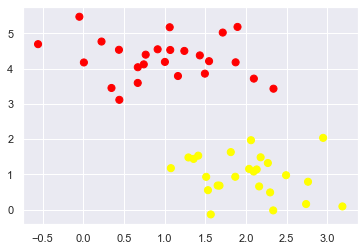

In [14]:
# we are importing the make_blobs dataset as it can be clearly seen to be linearly separable
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

In [15]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [16]:
# helper plotting function
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolors='b');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

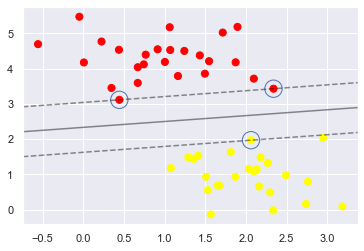

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

As we can see SVM works quite well when it deals with linearly separable datasets. The points which lie on the dotted lines denoted by $y_{i}(\vec{w}\cdot\vec{x}_{i} + b) = \pm1$ are the **support vectors**. Part of the reason why SVMs are popular are because, during the classification step only support vectors are used to classify a new point. This reduces the computational load significantly.

In the previous example we've seen how we can find a model to classify linearly separable data. Lets look at an example and see if SVMs can find a solution when the data is non-linear.

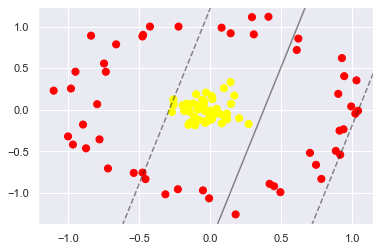

In [18]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [19]:
r = np.exp(-(X ** 2).sum(1))

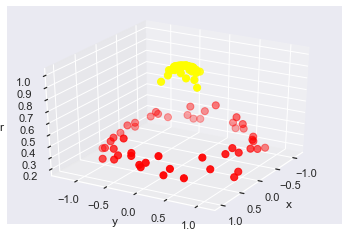

In [20]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

plot_3D()
# interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
#          X=fixed(X), y=fixed(y))

## An example using the Radial Basis Function(rbf) Kernel

The rbf kernel is written as, 

$$k(x_{i},x_{j}) = exp(-||x_{i} - x_{j}||^{2}/2\sigma^{2}) $$

where $\sigma$ is a tunable parameter 

What we should understand here is that the rbf kernel projects our data into an infinite dimensional feature space, however, the computational power required to compute the kernel function's value is quite negligible! As you see, we don't have to compute the dot product of the infinite dimensional vectors. This is how kernels help SVMs tackle non-linearly separable data. 

Rbf kernel in action:

In [21]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y) 

SVC(C=1000000.0)

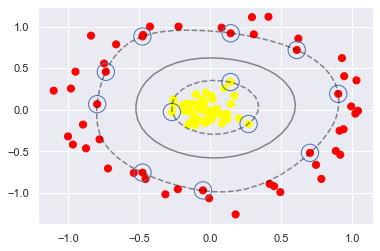

In [23]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

### This notebook is inspired by the resources from QISKIT India Challenge 2020

## Reference
- Qiskit India challlenge 2020
- Andrew NG notes: http://cs229.stanford.edu/notes/cs229-notes3.pdf
- Andrew NG lecture: https://youtu.be/lDwow4aOrtg